# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
#Osher Cohen
#אושר כהן
#206617516
#oshrico2@gmail.com
# Details Student 2:
# -----------


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

CountVectorizer is configured to convert text data into a matrix of word counts, including unigrams, bigrams, and trigrams, with a vocabulary limited to 15,000 features. It ignores words that appear in over 50% or less than 2 documents.

Text data in the 'story' column of df_train is transformed into a matrix of word counts (X_vec), which is then converted into a DataFrame (train_set) with feature names.

In [11]:
vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=15000, max_df=0.5, min_df=2)
X_vec = vectorizer.fit_transform(df_train['story'])
train_set = pd.DataFrame(X_vec.toarray(), columns=vectorizer.get_feature_names_out())
y = df_train['gender']
X_train, X_validation, y_train, y_validation = train_test_split(train_set, y, test_size=0.2, random_state=42)


A Decision Tree Classifier (DT_clf) is trained on the X_train and y_train data.

Predictions are made for the validation data, resulting in an F1 Score of 0.8326 for Male and 0.4348 for Female labels.

The average F1 Score of 0.6337 is computed from these individual scores and is printed for evaluation. These scores reflect the model's performance in classifying both male and female categories.

In [12]:
DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(X_train,y_train)
y_dt_validation_pred = DT_clf.predict(X_validation)
f1_male = f1_score(y_validation, y_dt_validation_pred, pos_label='m')
f1_female = f1_score(y_validation, y_dt_validation_pred, pos_label='f')

avg_f1_dt = (f1_male + f1_female) / 2

print("F1 Score for Male:", f1_male)
print("F1 Score for Female:", f1_female)
print("Average F1 Score:", avg_f1_dt)


DecisionTreeClassifier(random_state=42)

F1 Score for Male: 0.832618025751073
F1 Score for Female: 0.43478260869565216
Average F1 Score: 0.6337003172233626


A Multinomial Naive Bayes classifier (nb_clf) is trained using the training data (X_train and y_train).

Predictions are made on the validation data, resulting in an F1 Score of 0.9046 for the Male label and 0.6230 for the Female label.

The average F1 Score of 0.7638 is calculated from these individual scores and printed for evaluation. These scores indicate how well the Multinomial Naive Bayes classifier performs in classifying both male and female categories.

In [13]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train,y_train)
y_nb_validation_pred = nb_clf.predict(X_validation)
nb_f1_male = f1_score(y_validation, y_nb_validation_pred, pos_label='m')
nb_f1_female = f1_score(y_validation, y_nb_validation_pred, pos_label='f')
avg_f1_nb = (nb_f1_male + nb_f1_female)/2
print("F1 Score for Male:", nb_f1_male)
print("F1 Score for Female:", nb_f1_female)
print("Average F1 Score:", avg_f1_nb)

MultinomialNB()

F1 Score for Male: 0.9045643153526972
F1 Score for Female: 0.6229508196721311
Average F1 Score: 0.7637575675124142


<b>For the Decision Tree Model:</b>

The target variable 'y_train' is replaced with binary labels (0 for 'f' and 1 for 'm').
Cross-validation is performed using a Decision Tree Classifier (DT_clf) with 5 folds, scoring with F1 measure.
The mean F1 score for the Decision Tree Model across all folds is approximately 0.8133.

<b>For the Naive Bayes Model:</b>

Cross-validation is performed using a Multinomial Naive Bayes classifier (nb_clf) with 5 folds, scoring with F1 measure.
The mean F1 score for the Naive Bayes Model across all folds is approximately 0.8724.
These mean F1 scores provide insights into the performance of both models on the training data when assessed through cross-validation.

In [14]:
y_replaced = y_train.replace({"f":0,"m":1})
print("Cross Validation for Decision Tree Model:")
f1_scores = cross_val_score(DT_clf, X_train, y_replaced,cv=5,scoring='f1')
f1_scores.mean()


print("Cross Validation for Naive Base Model:")
f1_scores_nb = cross_val_score(nb_clf, X_train, y_replaced,cv=5,scoring='f1')
f1_scores_nb.mean()

Cross Validation for Decision Tree Model:


0.8132927697132954

Cross Validation for Naive Base Model:


0.8724185455813137

Confusion matrices are computed for both the Decision Tree and Naive Bayes classifiers to evaluate their performance on the validation data.

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(120.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(627.9949494949494, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes Classifier')

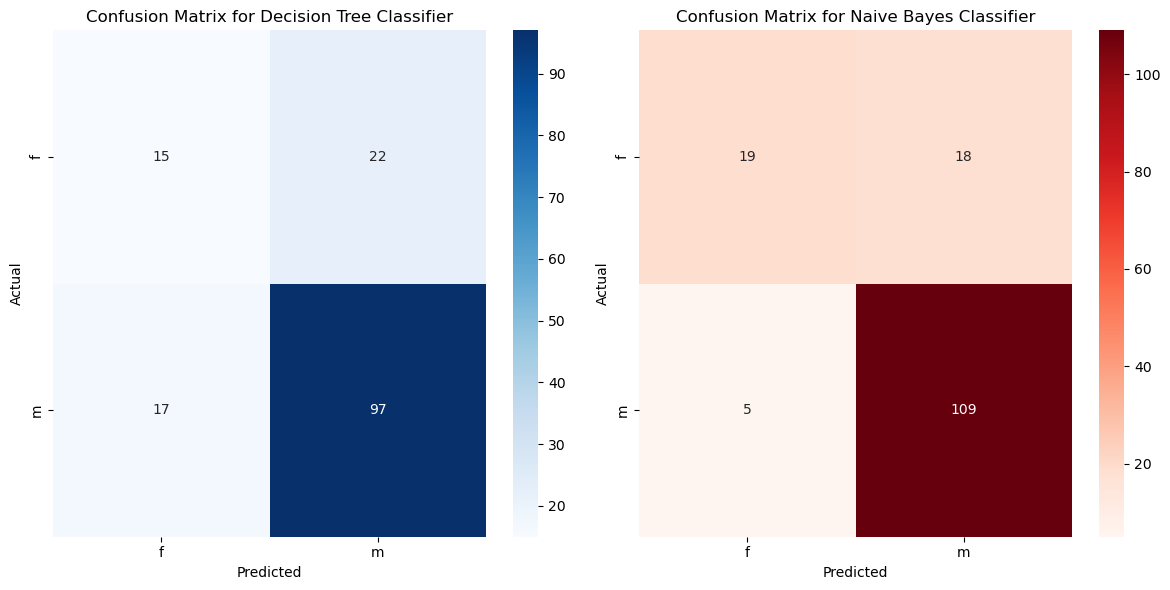

In [15]:
conf_matrix_dt = confusion_matrix(y_validation, y_dt_validation_pred)
conf_matrix_nb = confusion_matrix(y_validation, y_nb_validation_pred)

class_labels = nb_clf.classes_

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix for Decision Tree Classifier')

sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels, ax=axs[1])
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')
axs[1].set_title('Confusion Matrix for Naive Bayes Classifier')

plt.tight_layout()
plt.show()

Test text data is transformed into a feature matrix using the pre-fitted vectorizer.

Predictions for the test data are generated using the trained Naive Bayes classifier.

A new DataFrame is created to combine the test example IDs, stories, and predicted gender labels.


In [16]:
Test_vec = vectorizer.transform(df_test['story'])
test_set = pd.DataFrame(Test_vec.toarray(), columns=vectorizer.get_feature_names_out())

y_test_pred = nb_clf.predict(test_set)
y_test_pred_series = pd.Series(y_test_pred)

df_dict = {'test_example_id': df_test['test_example_id'], 'Story': df_test['story'],'Gender':y_test_pred_series}
df_predicted = pd.DataFrame(df_dict)

In [17]:
df_predicted.head(20)

,test_example_id,Story,Gender
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...,m
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""...",m
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,m
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני...",m
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,m
5,5,בפעם האחרונה שהייתי מחוץ לארץ ישראל הייתי באפר...,m
6,6,בשנת 2018 קיבלתי החלטה שאני מתחיל ללמוד לתואר ...,m
7,7,"בנובמבר האחרון הייתי עם חברים בטיול ים אל ים, ...",m
8,8,"לפני מספר חודשים, ביום שמש בהיר, קמתי בבוקר למ...",m
9,9,"אני לא בן אדם שנוטה לשתף בחייו האישיים, אבל או...",m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [18]:
df_predicted.to_csv('classification_results.csv', index=False, encoding='utf-8')


In [19]:
df_predicted.to_excel('classification_results.xlsx', index=False)
